In [6]:
#Data Handling
import pandas as pd
import numpy as np

#Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
import plotly.express as px
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

Note: you may need to restart the kernel to use updated packages.


In [7]:
path = "D:\Desktop\Feynns lab task 2\ElectricCarData.csv"

In [8]:
df = pd.read_csv(path)

In [9]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7000,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8000,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5000,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [10]:
df.shape

(103, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [12]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [13]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000
mean,7.3961,179.1942,338.7864,189.1650,4.8835,55811.5631
std,3.0174,43.5730,126.0144,29.5668,0.7958,34134.6653
min,2.1000,123.0000,95.0000,104.0000,2.0000,20129.0000
25%,5.1000,150.0000,250.0000,168.0000,5.0000,34429.5000
50%,7.3000,160.0000,340.0000,180.0000,5.0000,45000.0000
75%,9.0000,200.0000,400.0000,203.0000,5.0000,65000.0000
max,22.4000,410.0000,970.0000,273.0000,7.0000,215000.0000


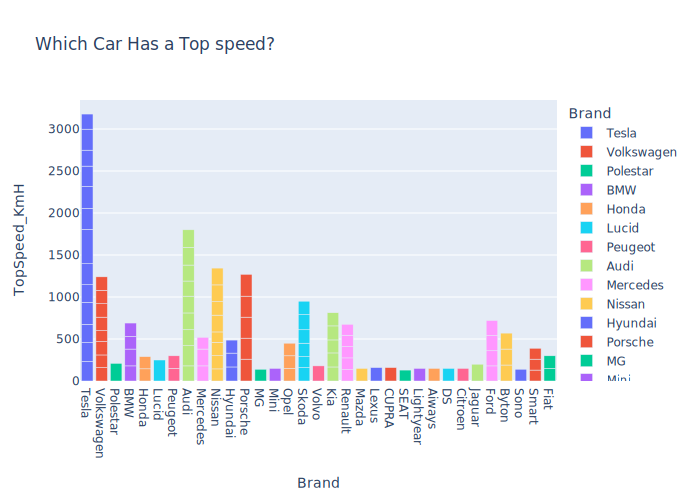

In [14]:
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

In [15]:
df = df[~df['FastCharge_KmH'].isin(['-'])] 

In [16]:
df['FastCharge_KmH'] = df['FastCharge_KmH'].apply(pd.to_numeric) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


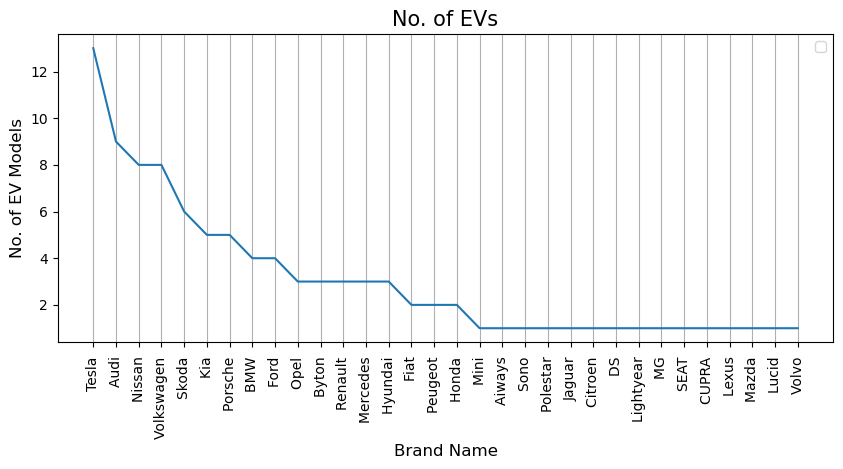

In [17]:
# Total number of models from respected brand
plt.figure(figsize=(10,4))
plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.legend()
plt.xlabel("Brand Name",fontsize=12)
plt.ylabel("No. of EV Models",fontsize=12)
plt.title('No. of EVs',fontsize=15)
plt.plot(df['Brand'].value_counts(), label='No. of Models')
plt.show()

There are more no. of models available at Tesla, Audi, Nissan, Volkswagen and skoda so that we can say they have enough experince and updated EV's comparatively

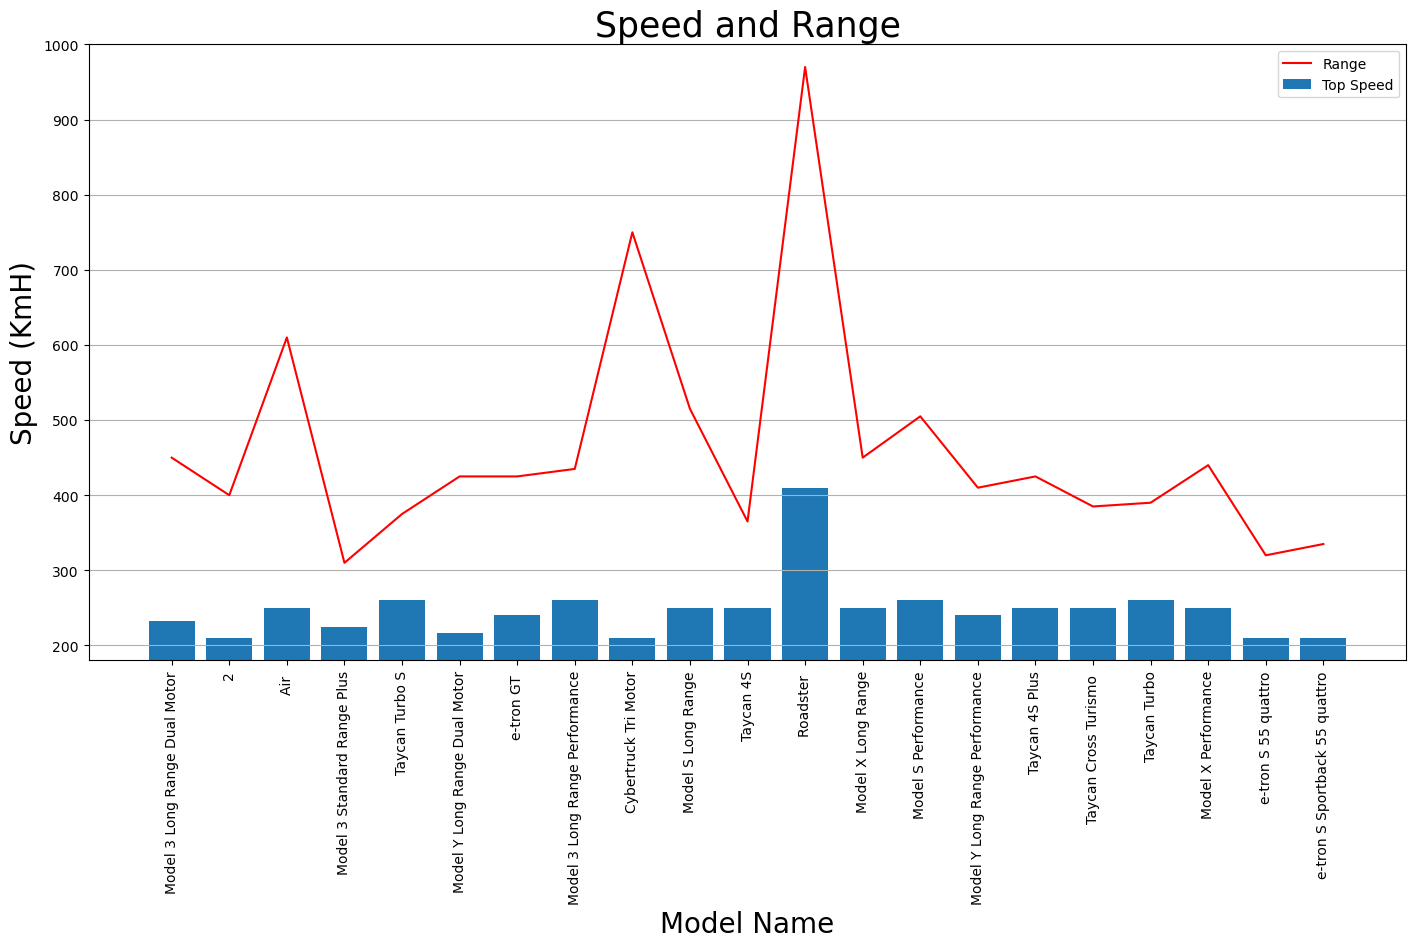

In [18]:
# Top Speed and Range filtration
df2 = df[df['TopSpeed_KmH']>200] # speed more than 200KmH

plt.figure(figsize=(17,8))
plt.title("Speed and Range",fontsize=25)
plt.grid(axis='y')
plt.ylim(bottom=180,top=1000)
plt.xticks(rotation = 90)
plt.xlabel("Model Name",fontsize=20)
plt.ylabel("Speed (KmH)",fontsize=20)
plt.bar(df2['Model'],df2['TopSpeed_KmH'],label='Top Speed') # Bar graph showing Top Speed
plt.plot(df2['Model'],df2['Range_Km'],label='Range',c='r') # Line graph showing Range of vehicle
plt.legend()

There are much of models speed above 200kmH and subsequently with the range

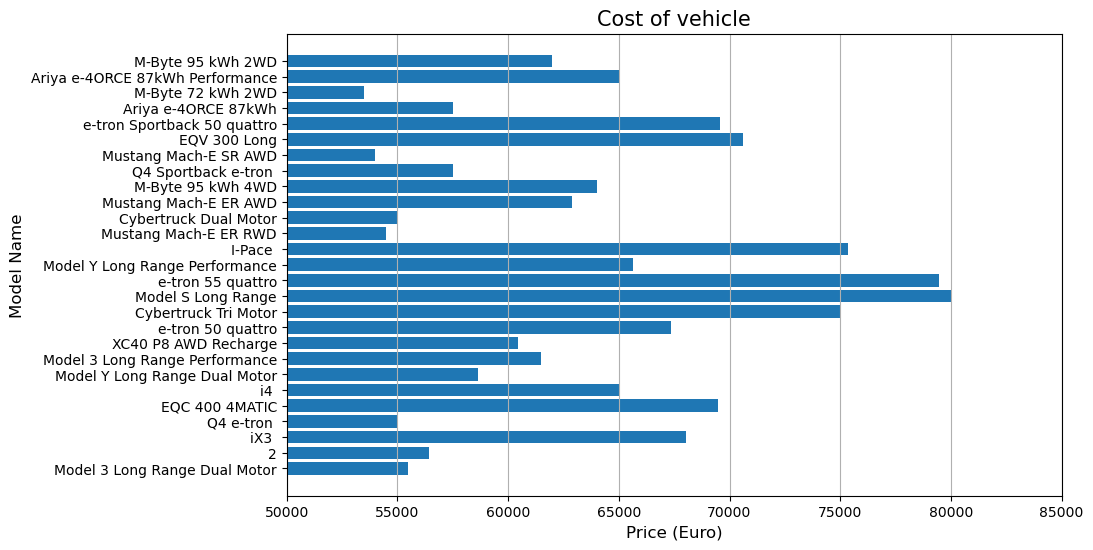

In [19]:
#Filteration according to Price Range
df2 = df[df['PriceEuro']>50000] # cost greater than 50000 Euros
df3 =df2[df2['PriceEuro']<80000] # cost less than 80000 Euros

plt.figure(figsize=(10,6))
plt.title("Cost of vehicle",fontsize=15)
plt.xticks(rotation = 0)
plt.grid(axis='x')
plt.xlim(50000,85000)
plt.ylabel("Model Name",fontsize=12)
plt.xlabel("Price (Euro)",fontsize=12)
plt.barh(df3['Model'],df3['PriceEuro'],label='Range')
plt.show()

This shows the top speed of around more than 400KmH is the Roadster which is from tesla and other models that are quiet good in top speed

<AxesSubplot:>

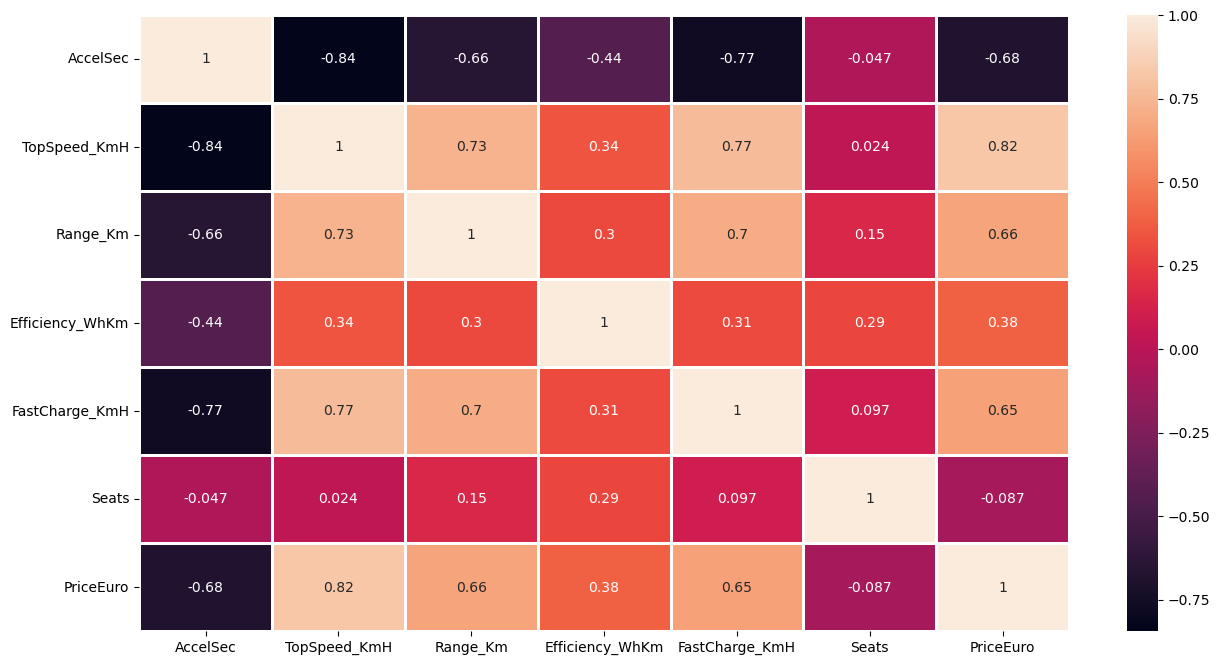

In [20]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [21]:
n_val = df.select_dtypes(exclude=['object']).drop(["PriceEuro"], axis=1).copy()   #  "SalePrice" is not there
print(n_val.columns)
l=[]
for i in n_val:
  l.append(i)
print("Total no of numerical variables:",len(l))

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats'],
      dtype='object')
Total no of numerical variables: 6


In [22]:
c_val = df.select_dtypes(include=['object']).copy()
print(c_val.columns)
l=[]
for i in c_val:
  l.append(i)
print("Total no of categorical variables:",len(l))

Index(['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment'],
      dtype='object')
Total no of categorical variables: 7


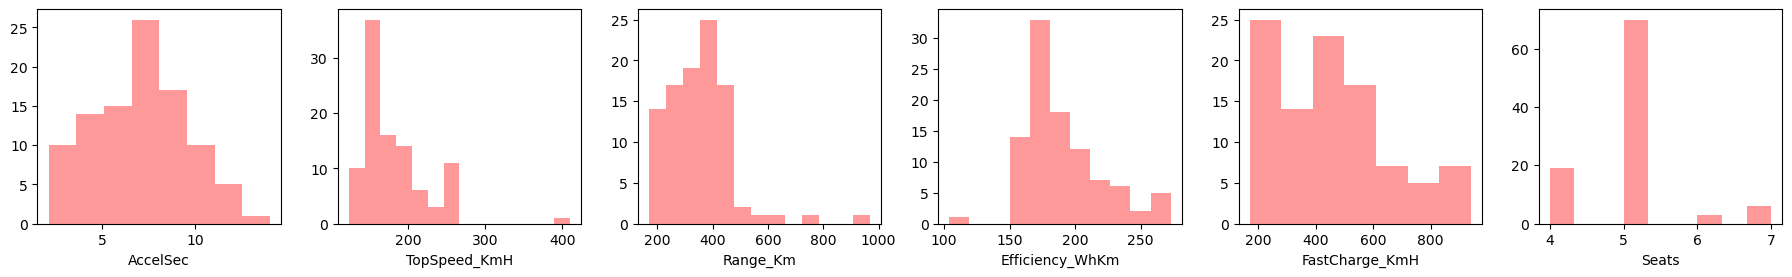

In [23]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(n_val):
    plt.subplot(6,6,index+1)
    sb.distplot(n_val.loc[:,col].dropna(), kde=False,color='r')
fig.tight_layout(pad=1.0)

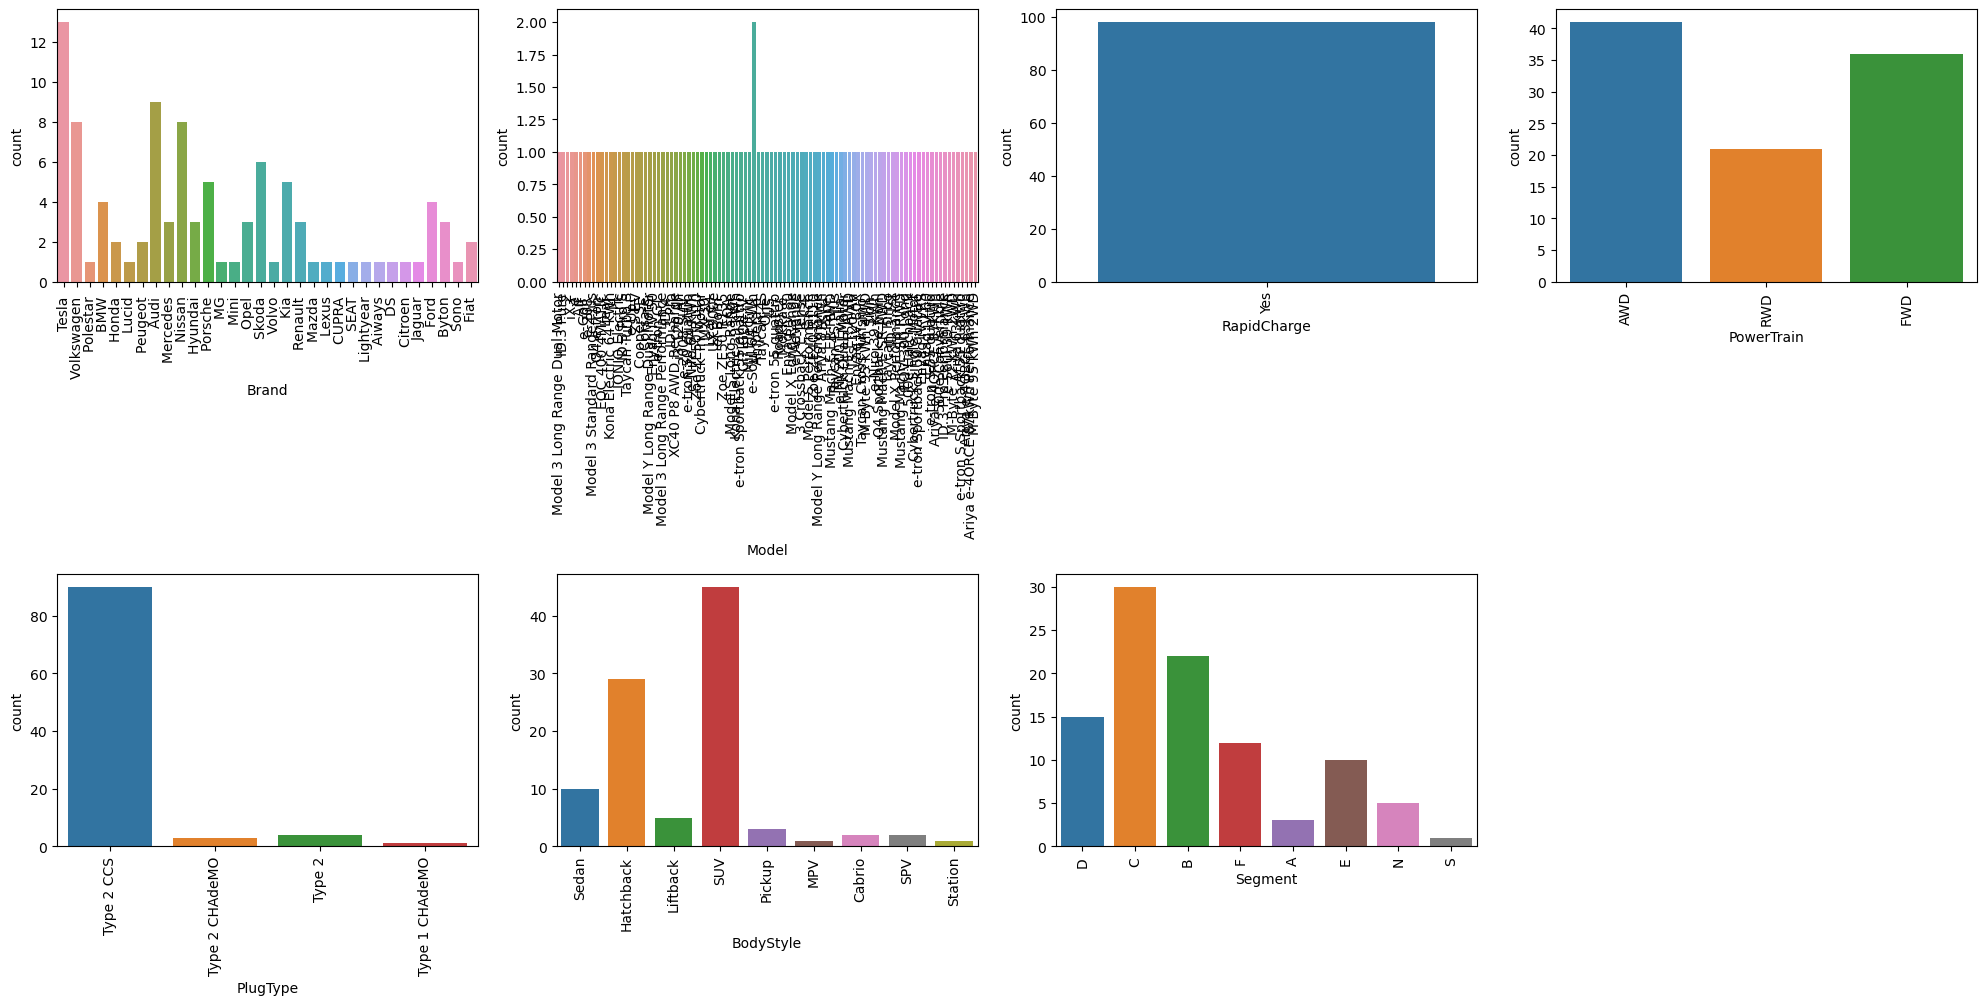

In [24]:
fig = plt.figure(figsize=(20,20))
for index in range(len(c_val.columns)):
    plt.subplot(4,4,index+1)
    sb.countplot(x=c_val.iloc[:,index], data=c_val.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

<AxesSubplot:>

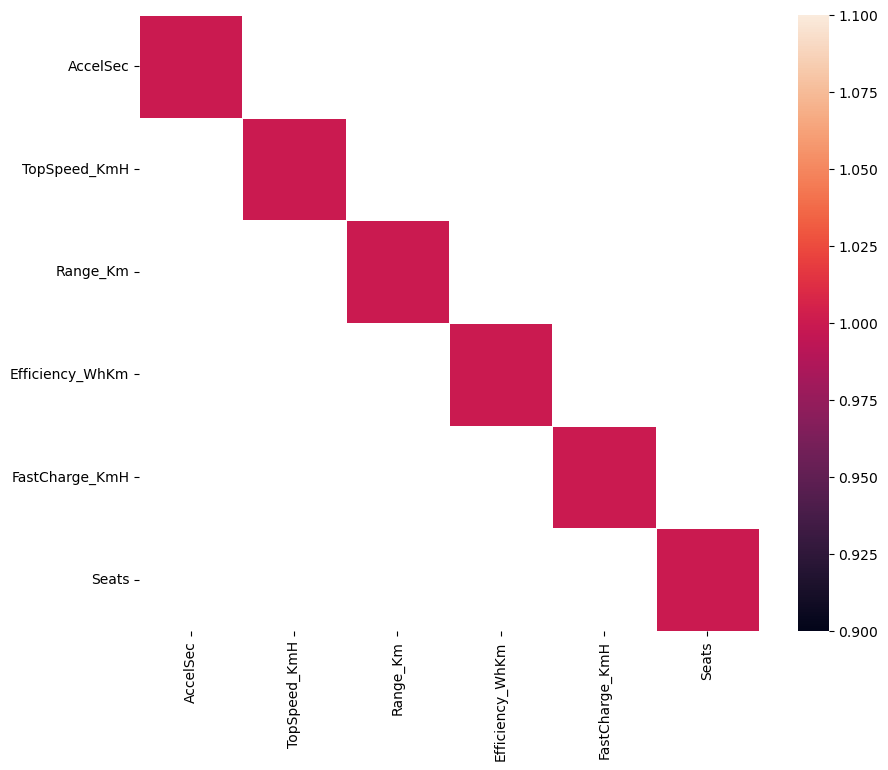

In [25]:
plt.figure(figsize=(10,8))
correlation = n_val.corr()
sb.heatmap(correlation, mask = correlation <0.8, linewidth=0.5)

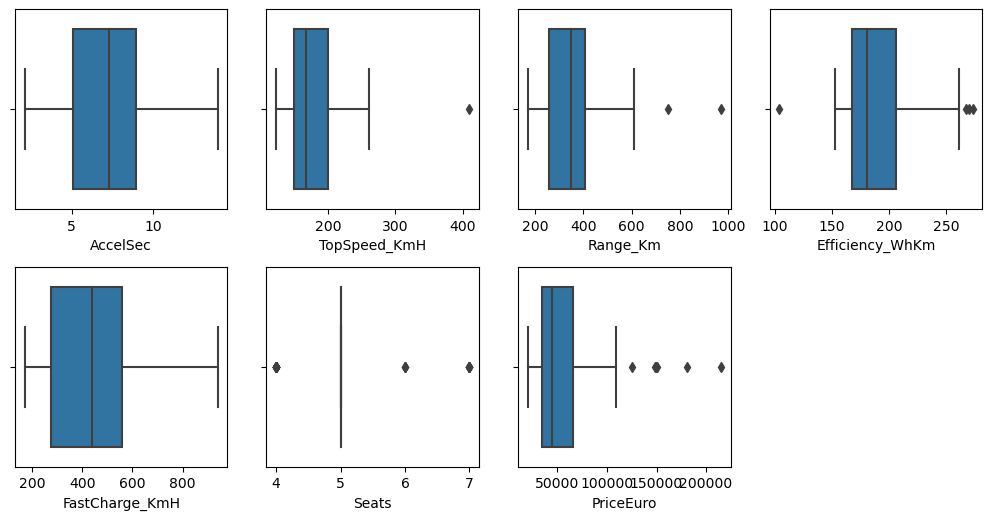

In [26]:
nval_col1 = df.select_dtypes(exclude=['object']).copy()
fig = plt.figure(figsize=(10,10))
for index,col in enumerate(nval_col1):
    plt.subplot(4,4,index+1)
    sb.boxplot(nval_col1.loc[:,col].dropna())
fig.tight_layout(pad=1.0)


In [27]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [28]:

for feature in df.columns:
  if df[feature].dtype=="object":
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Brand and number of categories are 32
The feature is Model and number of categories are 97
The feature is RapidCharge and number of categories are 1
The feature is PowerTrain and number of categories are 3
The feature is PlugType and number of categories are 4
The feature is BodyStyle and number of categories are 9
The feature is Segment and number of categories are 8


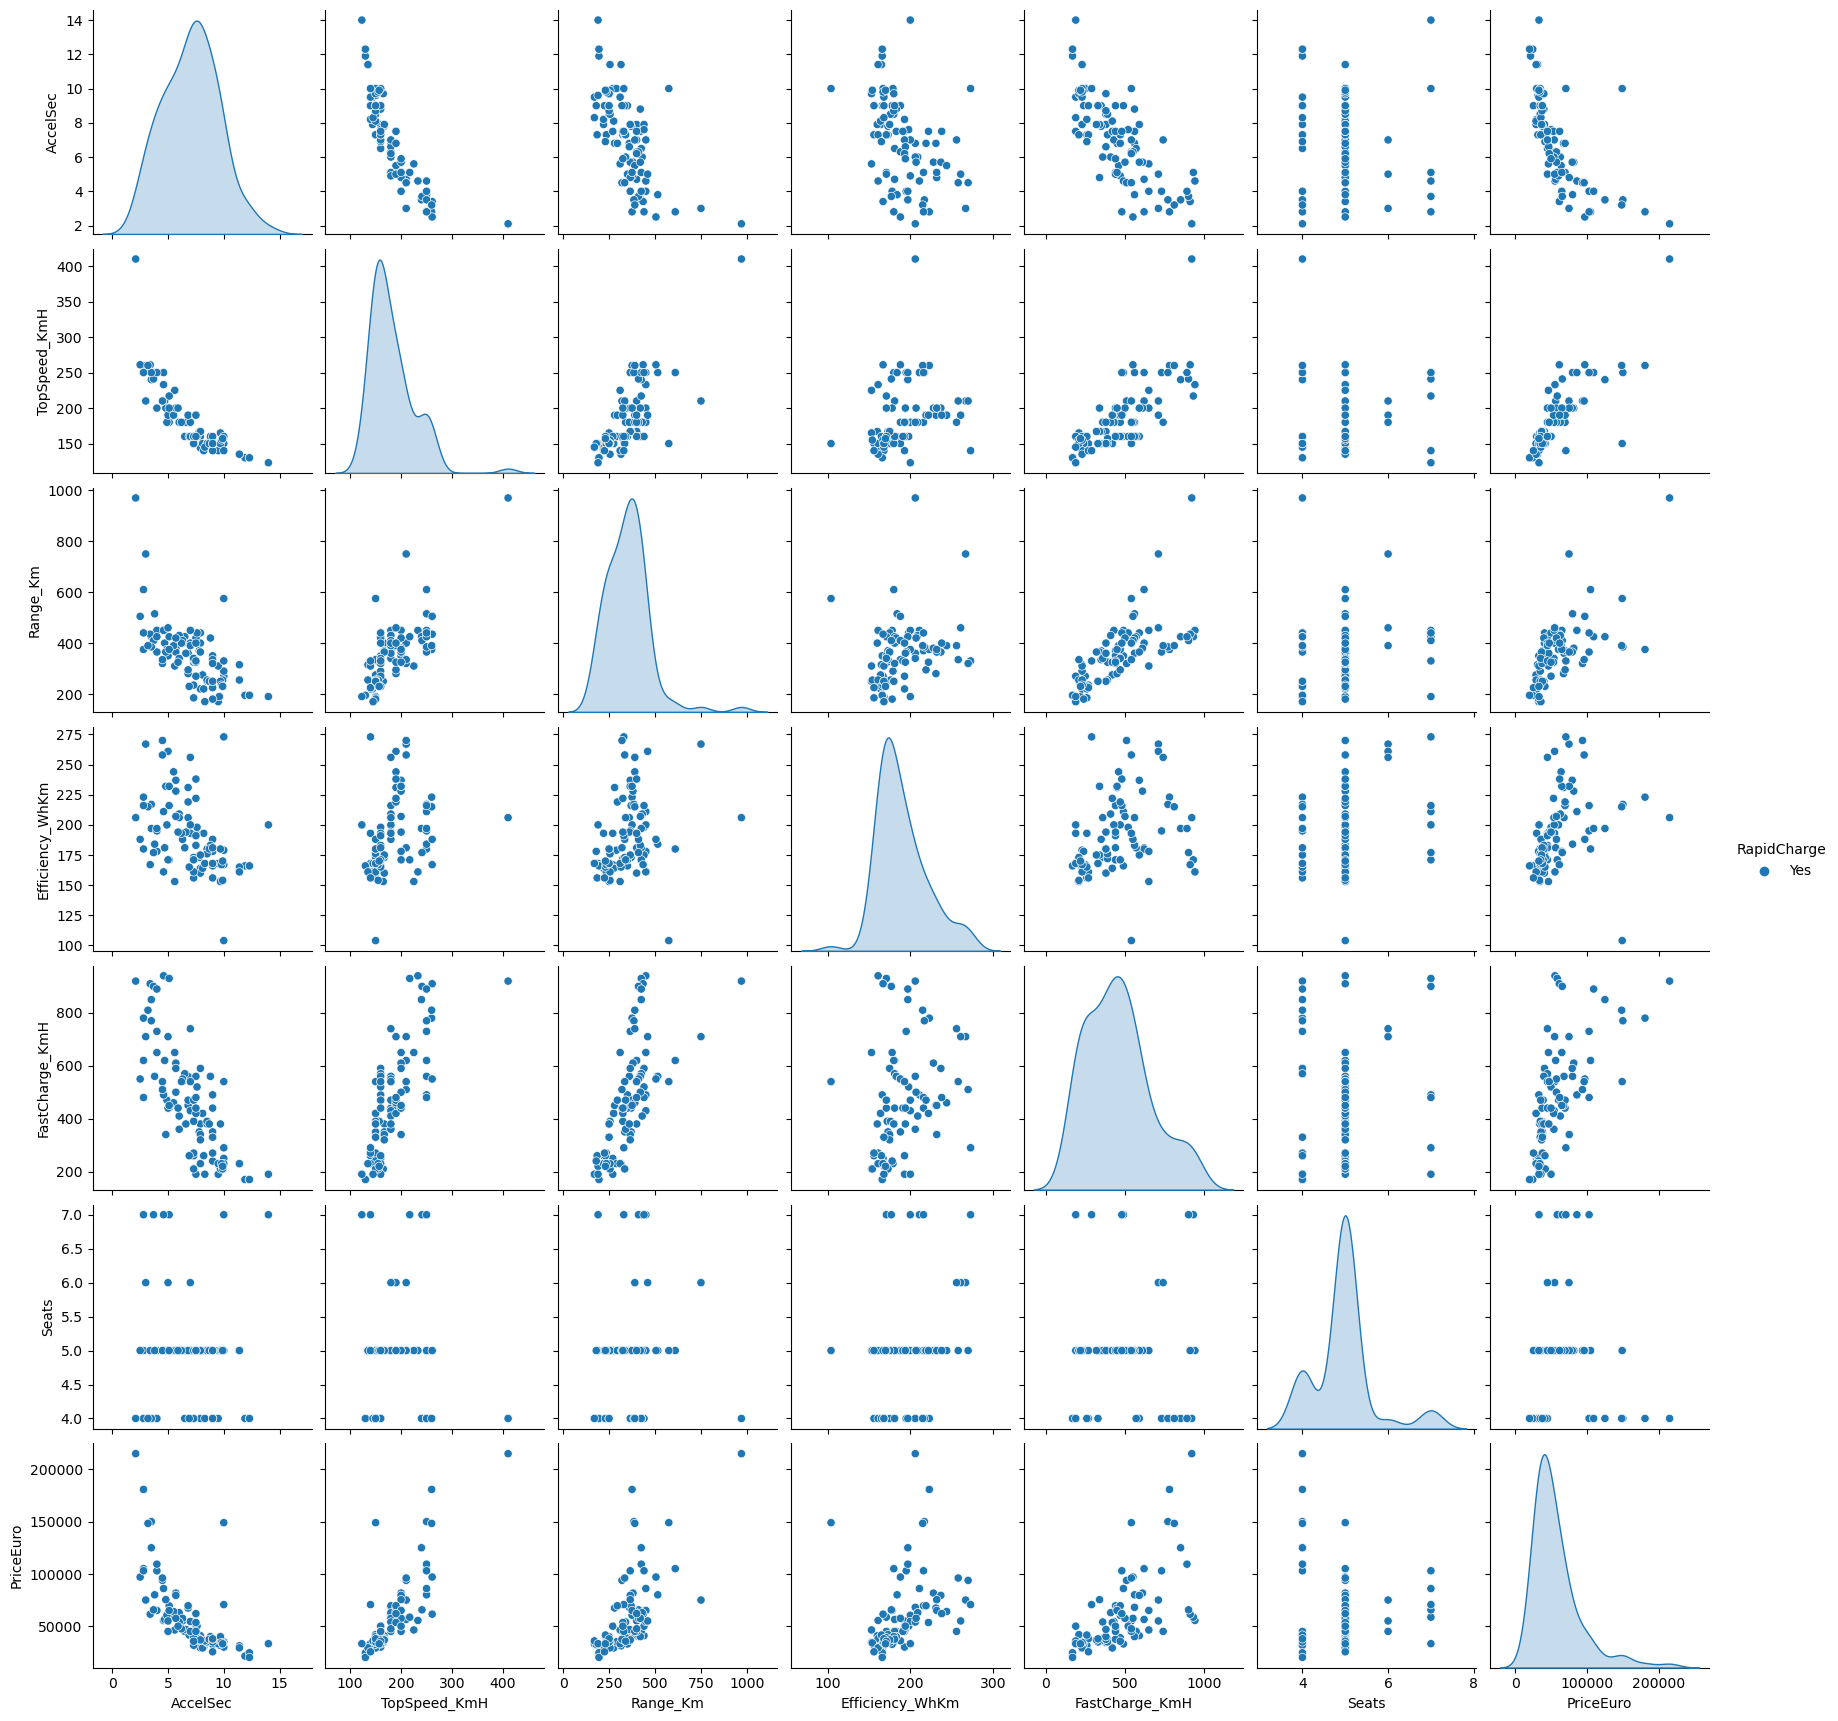

In [29]:
sb.pairplot(df,hue='RapidCharge')

In [30]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
df["RapidCharge"].replace(to_replace=["Yes","No"],value=[1,0],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']

In [31]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [32]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     45.16
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           2.54e-23
Time:                        15:59:17   Log-Likelihood:                -1101.2
No. Observations:                  98   AIC:                             2214.
Df Residuals:                      92   BIC:                             2230.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
AccelSec         2142.8352   1536.122      1.395      0.166    -908.035    5193.705
Range_Km           40.3503     23.962      1.684      0.096      -7.240      87.941
TopSpeed_KmH      591.3890     93.934      6.296      0.000     404.828     777.950
Efficiency_WhKm   120.4123     72.889      1.652      0.102     -24.351     265.176
RapidCharge     -1.092e+05   3.01e+04     -3.626      0.000   -1.69e+05   -4.94e+04
PowerTrain       5812.8698   3062.486      1.898      0.061    -269.492    1.19e+04
==============================================================================
Omnibus:                       78.271   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.320
Skew:                           2.544   Prob(JB):                    8.81e-130
Kurtosis:                      13.939   Cond. No.                     7.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [34]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [35]:
r2=(r2_score(y_test,pred))
print(r2*100)

71.96658310665909


<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

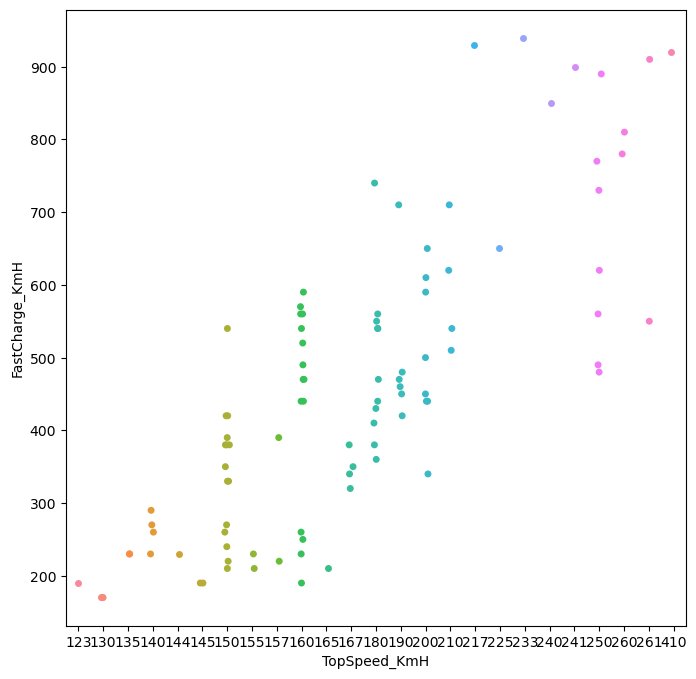

In [36]:
# clustering 
ax=plt.subplots(figsize=(8,8))
sb.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

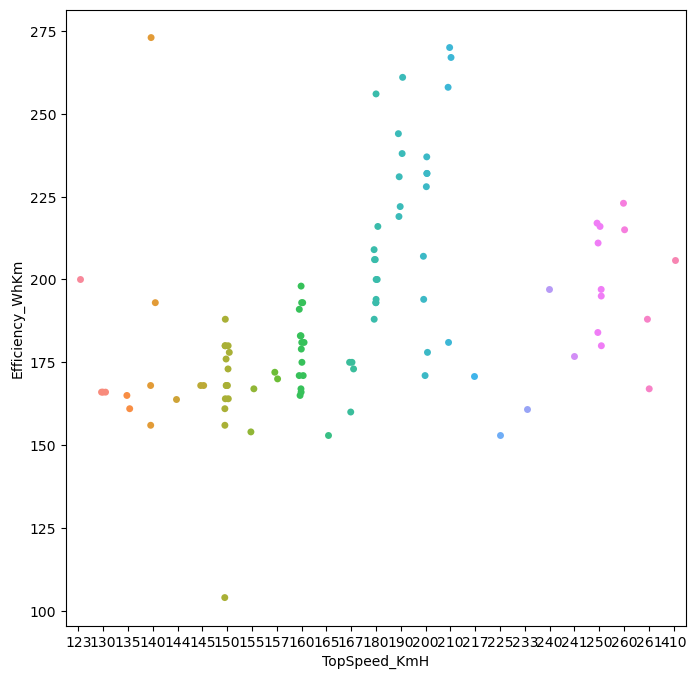

In [37]:
ax=plt.subplots(figsize=(8,8))
sb.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [38]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats','PowerTrain','PriceEuro']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
     

pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.2962,-0.7388,1.2263,1.0796,-1.2576,0.5097,0.6685,-0.4295,0.0000
1,-2.3951,-0.1877,0.6607,-0.4496,0.3314,-0.4780,-0.2003,-0.3254,-0.0000
2,1.4201,-0.1548,0.1658,0.8124,-0.6818,0.3500,-0.1554,-0.0693,-0.0000
3,0.0379,-0.1056,0.6317,-1.5528,-0.0483,-0.4208,0.2903,0.2106,0.0000
4,-2.9541,-1.2492,-0.5197,-0.6743,-0.0833,-0.4782,-0.2088,-0.0666,0.0000
...,...,...,...,...,...,...,...,...,...
93,-0.6116,0.1927,0.0615,-0.1825,-0.1171,0.1835,0.1093,0.1469,0.0000
94,2.1852,0.9438,-1.6979,-0.7453,-0.1773,-0.2900,0.0873,0.1203,0.0000
95,0.5406,0.2803,-0.5821,0.6969,-0.4354,0.1100,-0.3643,-0.2468,0.0000
96,1.3504,0.7742,-1.1160,-0.1676,-0.1364,0.3160,-0.3745,-0.0671,0.0000


In [39]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.2962,-0.7388,1.2263,1.0796,-1.2576,0.5097,0.6685,-0.4295,0.0000
1,-2.3951,-0.1877,0.6607,-0.4496,0.3314,-0.4780,-0.2003,-0.3254,-0.0000
2,1.4201,-0.1548,0.1658,0.8124,-0.6818,0.3500,-0.1554,-0.0693,-0.0000


In [40]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.4223,0.0639,0.0075,0.0753,0.5101,-0.0092,0.5524,-0.4964,0.0000
PC2,0.4355,-0.1563,0.0749,0.0229,-0.0277,-0.3759,-0.2991,-0.7404,-0.0000
PC3,0.2459,0.4925,-0.5103,-0.6262,0.0343,0.1415,0.0741,-0.1333,-0.0000
PC4,0.3999,-0.0964,0.3123,-0.0792,-0.4574,0.1156,0.7089,-0.0432,0.0000
PC5,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-1.0000
PC6,0.3832,-0.0467,0.4131,-0.0811,0.5350,0.5999,-0.1652,0.0167,0.0000
PC7,0.0620,0.8007,0.4624,0.1861,0.0326,-0.3108,-0.0319,0.0894,0.0000
PC8,0.3123,0.1936,-0.4727,0.7444,-0.0115,0.2771,0.0855,-0.0568,-0.0000
PC9,0.4042,-0.1971,-0.1688,-0.0134,0.4912,-0.5403,0.2485,0.4174,-0.0000


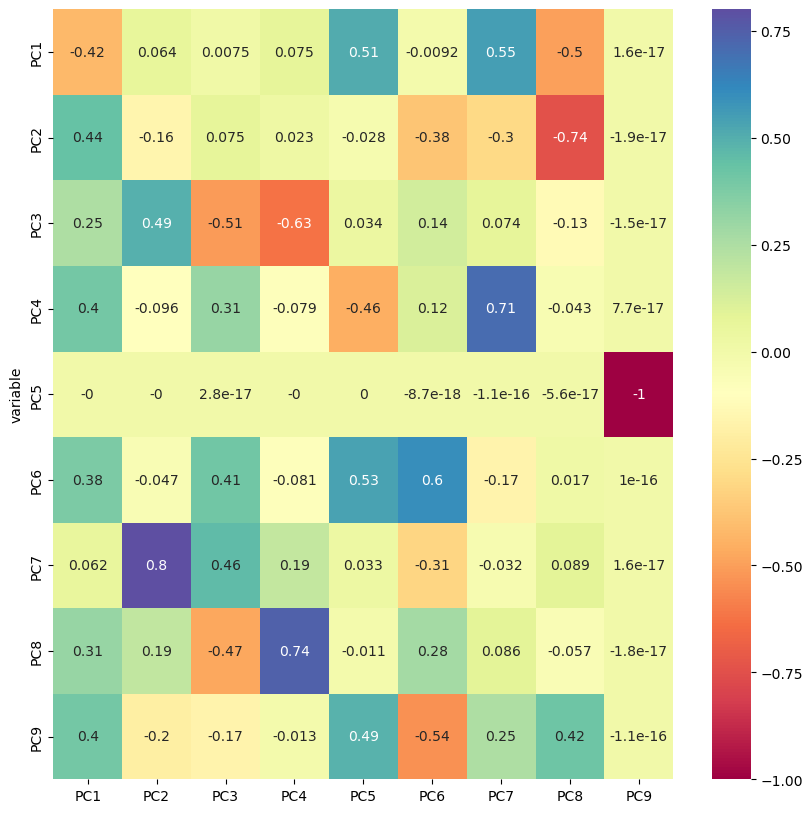

In [41]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (10,10)
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

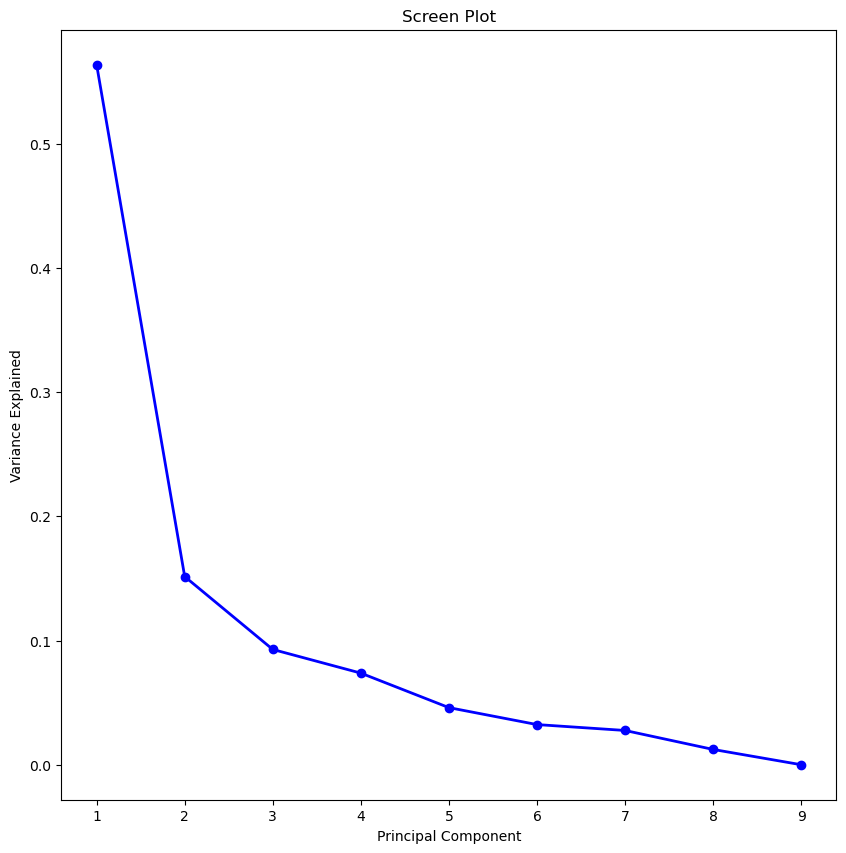

In [42]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [43]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.
     

[2 1 0 3 1 2 1 1 3 0 0 1 1 3 1 3 2 1 1 1 1 0 1 2 2 3 3 0 1 1 0 1 1 0 1 1 1
 3 1 0 2 1 0 1 1 1 1 2 2 1 0 2 1 3 0 1 1 1 2 1 0 3 0 3 2 1 0 0 1 0 2 0 1 1
 0 0 2 3 0 3 0 1 3 0 0 3 0 1 0 1 3 1 3 3 0 0 0 0]
324.8088053246839
5
[[ 1.38041  0.98598 -0.40309  0.17736 -0.11438  0.18509 -0.06012  0.02689
   0.     ]
 [-1.95182 -0.17035 -0.10438  0.20814  0.08841 -0.08151 -0.07183 -0.04276
   0.     ]
 [ 3.38485 -1.35088 -0.00112  0.3884   0.14419 -0.24174  0.21389 -0.00749
   0.     ]
 [-0.46552 -0.25813  0.92793 -1.07705 -0.11797  0.05612  0.10377  0.05795
  -0.     ]]


In [44]:

Counter(kmeans.labels_)

Counter({2: 13, 1: 39, 0: 29, 3: 17})